<a href="https://colab.research.google.com/github/gunjanrane12/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

!pip install opencv-python seaborn

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.
Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


In [1]:
!pip install opencv-python seaborn tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from google.colab import files
import os
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and preprocess dataset
data_dir = "/kaggle/input/brain-tumor-mri-dataset"  # Update with actual dataset path
image_size = (128, 128)  # Resizing images
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = data_gen.flow_from_directory(
    os.path.join(data_dir, "Training"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = data_gen.flow_from_directory(
    os.path.join(data_dir, "Testing"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Building CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #0.0001

# Train the model
epochs = 40
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the trained model
os.makedirs("model", exist_ok=True)

model.save("brain_tumor_cnn_model.h5")
shutil.make_archive("model", 'zip', "model")
print("✅ Model folder compressed to model.zip")
files.download("model.zip")
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.3129 - loss: 1.3157 - val_accuracy: 0.5141 - val_loss: 1.1333
Epoch 2/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.5726 - loss: 0.9924 - val_accuracy: 0.5942 - val_loss: 1.0232
Epoch 3/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6302 - loss: 0.8998 - val_accuracy: 0.5797 - val_loss: 0.9898
Epoch 4/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6548 - loss: 0.8495 - val_accuracy: 0.5728 - val_loss: 0.9869
Epoch 5/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.6781 - loss: 0.8039 - val_accuracy: 0.6461 - val_loss: 0.8593
Epoch 6/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6756 - loss: 0.7794 - val_accuracy: 0.6545 - val_loss: 0.8372
Epoch 7/40
179/179 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7053 - loss: 0.7403 - val_accuracy: 0.6667 - val_loss: 0.8065
Epoch 8/40
17

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


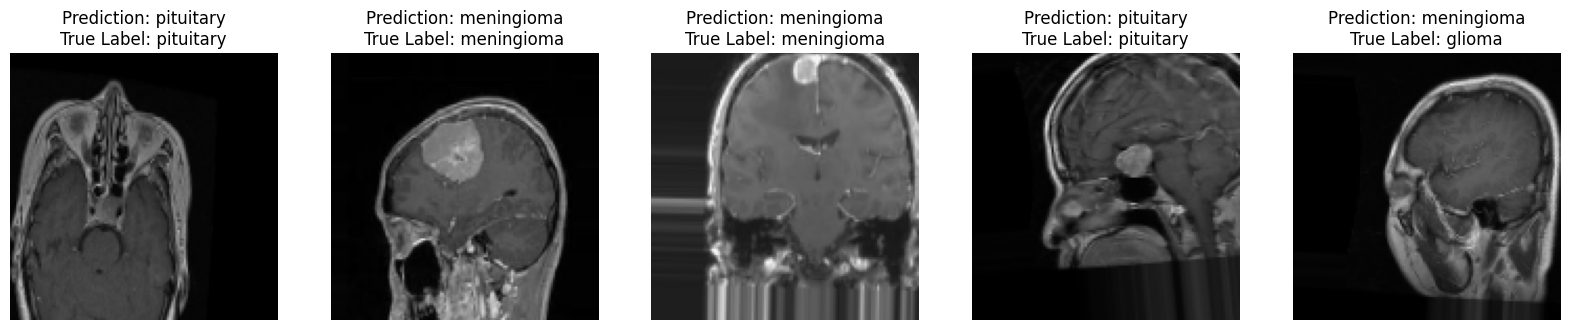

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 308ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.23      0.23      0.23       300
  meningioma       0.24      0.27      0.25       306
     notumor       0.28      0.28      0.28       405
   pituitary       0.23      0.19      0.21       300

    accuracy                           0.25      1311
   macro avg       0.24      0.24      0.24      1311
weighted avg       0.25      0.25      0.25      1311



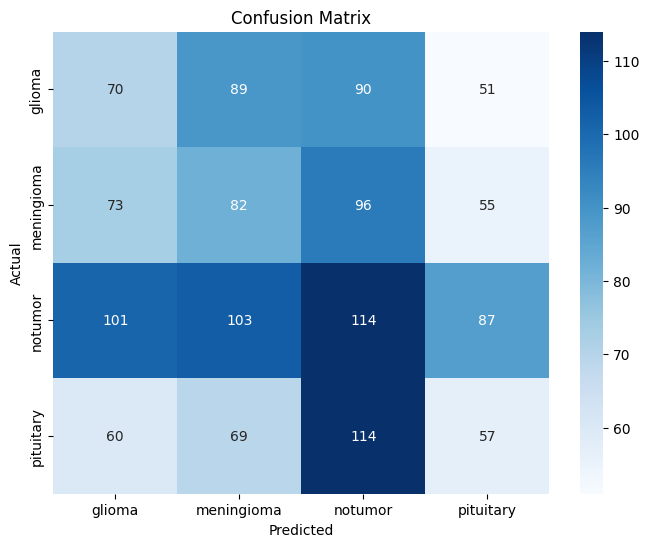

In [ ]:
import tensorflow as tf
import shutil
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



data_dir = "/kaggle/input/brain-tumor-mri-dataset"  # Update with actual dataset path
image_size = (128, 128)  # Resizing images
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
train_data = data_gen.flow_from_directory(
    os.path.join(data_dir, "Training"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
# Visualizing Predictions
class_labels = list(train_data.class_indices.keys())
test_data = data_gen.flow_from_directory(
    os.path.join(data_dir, "Testing"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

model = tf.keras.models.load_model("brain_tumor_cnn_model.h5") #changed this to corrected verion
test_images, test_labels = next(test_data)
num_samples = 5
random_indices = random.sample(range(test_images.shape[0]), num_samples)

plt.figure(figsize=(20, 5))
for i, idx in enumerate(random_indices):
    image = test_images[idx]
    true_label = np.argmax(test_labels[idx])

    # Predict using the model
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image)
    plt.title(f"Prediction: {class_labels[predicted_label]}\nTrue Label: {class_labels[true_label]}")
    plt.axis("off")

plt.show()
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Reset test_data to ensure correct order
test_data.reset()

# Get predictions for the full test dataset
predictions = model.predict(test_data, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
